In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [11]:
colnames = ['X','Y']
lsf = pd.read_csv('lsf_of_gradient_avg_grad.csv', names=colnames, header=None)
# lsf.plot(x='X', y='Y', xlabel="dr", ylabel="dI", kind='line')


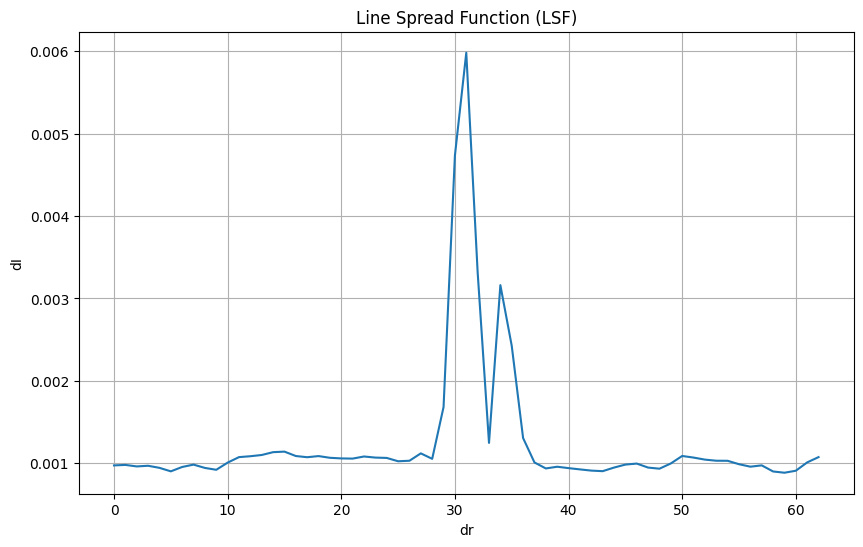

In [12]:
# Preparing the plot
plt.figure(figsize=(10, 6))
plt.plot(lsf['X'], lsf['Y'])
plt.title("Line Spread Function (LSF)")
plt.xlabel("dr")
plt.ylabel("dI")
plt.grid(True)

# Extracting the LSF values (assuming the second column represents LSF values)
lsf_values = lsf.iloc[:, 1]

Take 1-d discrete fourier transform of the lsf
https://docs.scipy.org/doc/scipy/tutorial/fft.html 

(0.0, 0.5)

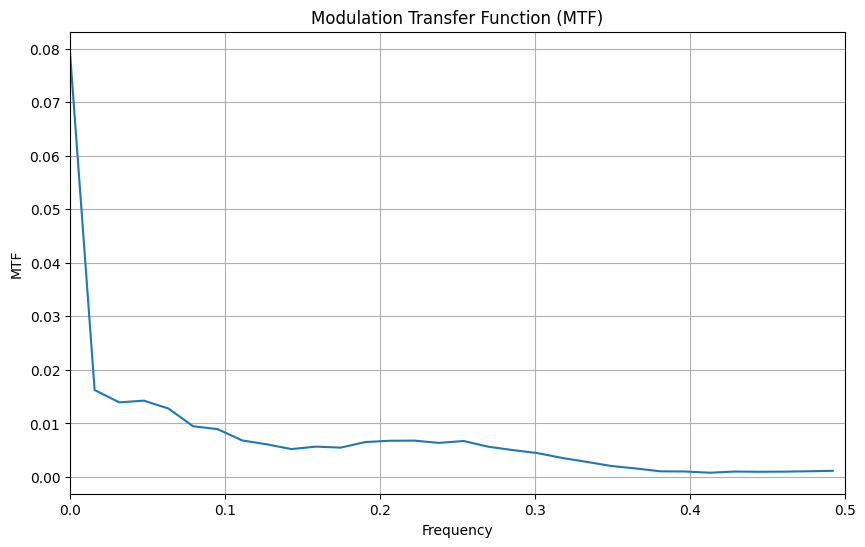

In [13]:
# Convert the LSF values from pandas series to numpy array to avoid compatibility issues
lsf_values_np = lsf_values.to_numpy()

# Perform Fourier Transform on the LSF values to obtain the MTF
mtf = np.abs(fft(lsf_values_np))

# Generate frequency axis for MTF plot
frequencies = np.fft.fftfreq(len(lsf_values_np))

# Sort the frequencies and corresponding MTF values for proper plotting
sorted_indices = np.argsort(frequencies)
sorted_frequencies = frequencies[sorted_indices]
sorted_mtf = mtf[sorted_indices]

# Preparing the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_frequencies, sorted_mtf)
plt.title("Modulation Transfer Function (MTF)")
plt.xlabel("Frequency")
plt.ylabel("MTF")
plt.grid(True)

# Since MTF is usually plotted for positive frequencies only
plt.xlim(0, 0.5)
